[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/juansensio/blog/blob/master/096_ml_unsupervised/096_ml_unsupervised.ipynb)

# ML - Aprendizaje No Supervisado

Si bien todos los ejemplos de *Machine Learning* que hemos visto hasta ahora en esta serie se han basado en aprendizaje supervisado (nuestros datos van acompañados de las etiquetas correspondientes, ejemplos de la tarea que queremos llevar a cabo) la mayoría de los datos no están etiquetados. Antes esta problemática tenemos dos alternativas: etiquetar datos manualmente (lo cual require de tiempo, esfuerzo y dinero en el caso de querer desarrollar sistemas reales) o bien usar técnicas de aprendizaje no supervisado, o *Unsupervised Learning* en inglés.

## Clustering

De entre las diferentes técnicas de aprendizaje no supervisado, el *Clustering* es una de las más usadas. Este técnica consiste en identificar aquellas muestras similares del conjunto de datos y asignarlas a un *cluster*, o grupo. Esto permite aplicaciones tales como: segmentación de clientes, análisis de datos, reducción de la dimensionalidad, detección de anomalías, aprendizaje semi-supervisado, motores de búsqueda e incluso la semgentación de imágenes.

### K-Means

El algoritmo de *K-Means* es uno de los más usados a la hora de aplicar *Clustering*, ya que es un método rápido y eficiente. Vamos a generar un conjunto de datos sintético para aprender a usar esta técnica.

In [ ]:
from sklearn.datasets import make_blobs
import numpy as np

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.2,  1.8],
     [-2.5,  2.8],
     [-2.8,  1.3]])
# blob_std = np.array([0.4, 0.4, 0.4, 0.4, 0.4])
# blob_std = np.array([0.4, 0.3, 0.2, 0.2, 0.2])
blob_std = np.array([0.7, 0.7, 0.7, 0.7, 0.7])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=42)

In [ ]:
import matplotlib.pyplot as plt

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

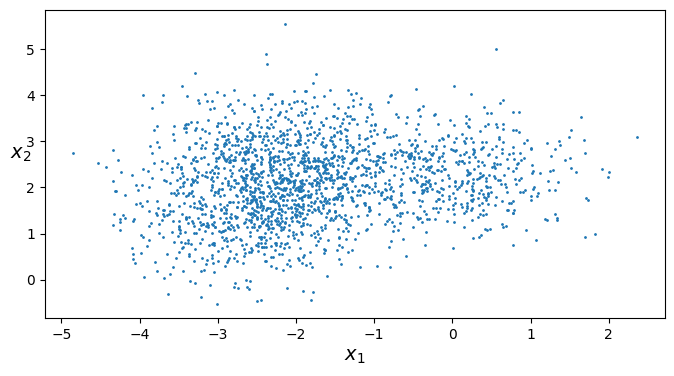

In [ ]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

En *Scikit-Learn* puedes usar el objeto [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), indicando el número de clusters deseado.  

In [ ]:
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)
y_pred

array([4, 2, 3, ..., 2, 1, 0], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[-1.64063231,  1.7085676 ],
       [-2.92302361,  2.65782101],
       [ 0.2575816 ,  2.29533285],
       [-2.88663818,  1.05838872],
       [-1.55257097,  3.05358107]])

In [ ]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([2, 2, 1, 1], dtype=int32)

In [ ]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=10, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=10,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

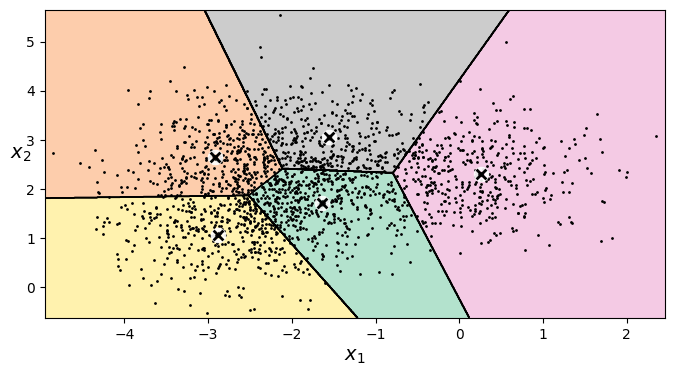

In [ ]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()


En lugar de asignar un grupo a cada muestra (*hard clustering*) se le puede asignar una puntuación (*soft clustering*) en función de su distancia al centroide.

In [ ]:
kmeans.transform(X_new)

array([[1.66631546, 2.99613008, 0.3918798 , 3.03633196, 1.87630213],
       [4.6497743 , 5.95944101, 2.75827485, 5.96147137, 4.6728937 ],
       [1.87501418, 0.35073042, 3.33292569, 1.94491781, 1.44842043],
       [1.57297355, 0.17559281, 3.26400468, 1.44606154, 1.54967829]])

Este algoritmo funciona asignando centroides de manera aleatoria y, de manera iterativa, asigna cada instancia a uno de ellos (el más cercano) tras lo cual se recalcula el centroide como el valor promedio de todas las instancias asignadas al grupo.

In [ ]:
# kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                    #  algorithm="full", max_iter=1, random_state=1)
# kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                    #  algorithm="lloyd", max_iter=1, random_state=1)
# kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=5,
                    #  algorithm="elkan", max_iter=1, random_state=1)
# Configuración del modelo K-Means con inicialización inteligente
kmeans_iter1 = KMeans(n_clusters=5, init="k-means++", n_init=1,
                      algorithm="elkan", max_iter=3, random_state=4)
# kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
#                      algorithm="full", max_iter=2, random_state=1)
# kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=5,
#                      algorithm="elkan", max_iter=2, random_state=1)
kmeans_iter2 = KMeans(n_clusters=5, init="k-means++", n_init=1,
                     algorithm="elkan", max_iter=2, random_state=1)

# kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
#                      algorithm="full", max_iter=3, random_state=1)
# kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=5,
#                      algorithm="elkan", max_iter=3, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init="k-means++", n_init=1,
                     algorithm="elkan", max_iter=3, random_state=5)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='elkan', max_iter=3, n_clusters=5, n_init=1, random_state=5)

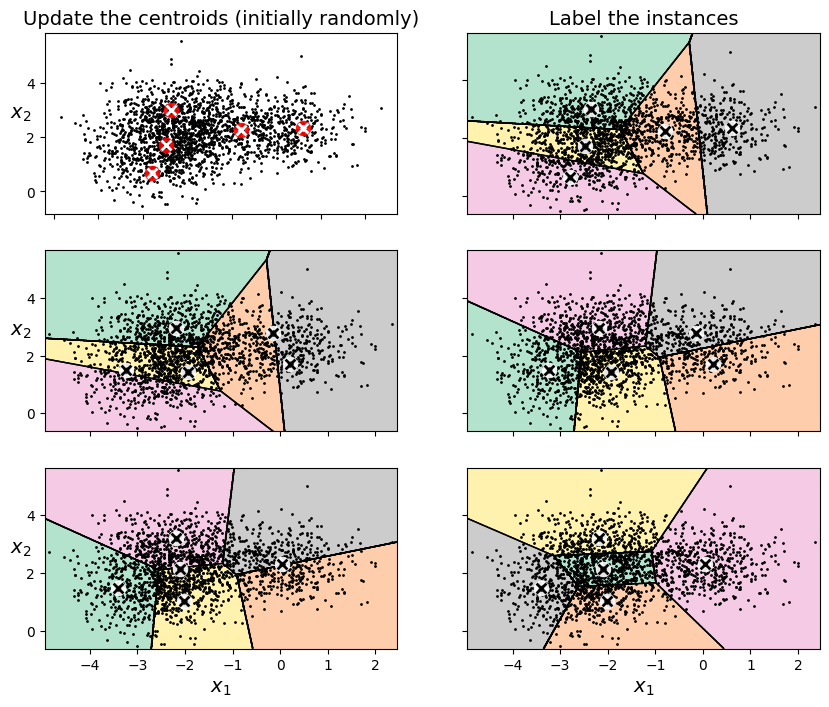

In [ ]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

Esto implica que en función del estado inicial, el algoritmo puede llegar a una solución u otra.

In [ ]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

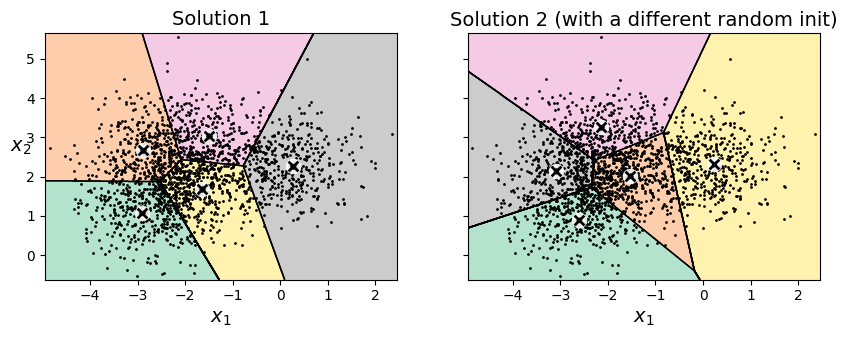

In [ ]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="elkan", random_state=19)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="k-means++", n_init=1,
                         algorithm="lloyd", random_state=19)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,"Solution 1", "Solution 2 (with a different random init)")

plt.show()

Para minimizar el impacto de la inicialización tenemos varias alternativas: probar varias y quedarnos con la mejor, o usar la inicialización inteligente que ofrece *Scikit-Learn* por defecto.

In [ ]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                              algorithm="elkan", random_state=11)
kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='elkan', init='random', n_clusters=5, n_init=10,
       random_state=11)

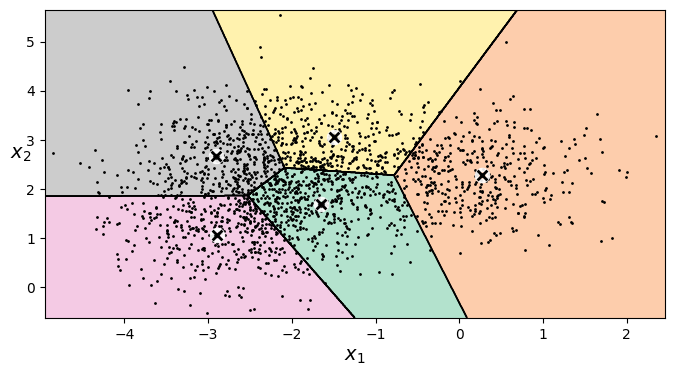

In [ ]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

Otras mejoras al algoritmo de *K-Means* incluyen: *K-Means* acelerados (usado por *Scikit-Learn* por defecto y que evita algunos cálculos de distancias) y *mini-batch K-Means* (que puedes usarse si el dataset es tan grande que no cabe en memoria). Vamos a ver un ejemplo de este último caso con el dataset MNIST, para lo cual usaremos el objeto [MiniBatchKMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html?highlight=minibatchkmeans#sklearn.cluster.MiniBatchKMeans).

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.int64)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    mnist["data"], mnist["target"], random_state=42)

In [ ]:
def load_next_batch(batch_size):
    return X[np.random.choice(len(X), batch_size, replace=False)]

In [ ]:
from sklearn.cluster import MiniBatchKMeans

k = 5
n_init = 10
n_iterations = 100
batch_size = 100
init_size = 500
evaluate_on_last_n_iters = 10

best_kmeans = None

for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size)
    X_init = load_next_batch(init_size)
    minibatch_kmeans.partial_fit(X_init)

    minibatch_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(X_batch)
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_

    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans

In [ ]:
best_kmeans.score(X)

-1099.2519939484375

El algoritmo de *mini-batch K-Means* es más rápido que *K-Means* normal, pero su precisión suele ser peor.

### Encontrando el número óptimo de grupos

Como hemos visto anteriormente, el número de grupos o *clusters* es un hyperparámetro del modelo que debemos definir, y como podrás imaginar si nuestros datos no están etiquetados no será imposible saber qué valor usar. Para ello la solución se basa en usar diferentes valores y utilizar alguna métrica significativa. Una de estas métricas se conoce como el *silhouette score*, que se basa en calcular el coeficiente de silueta (*silhouette coefficient*) de todas las muestras del dataset como $(b-a)/\mathrm{max}(a,b)$ donde $a$ es la distancia mínima al resto de muestras del mismo grupo y $b$ es la distancia media de los grupos más cercanos. Su valor se encuentra entre $1$ y $-1$. Un valor cercano a $1$ indica que la muestra está bien metida en su grupo y lejos de los demás mientras que un valor cercano a $0$ indica que la muestra se encuentra cerca de una frontera de decisión y un valor cercano a $-1$ indica que la muestra está en el grupo incorrecto.

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

np.float64(0.34605029451900676)

Calculando la métrica para diferentes números de *clusters* podemos encontrar el valor óptimo.

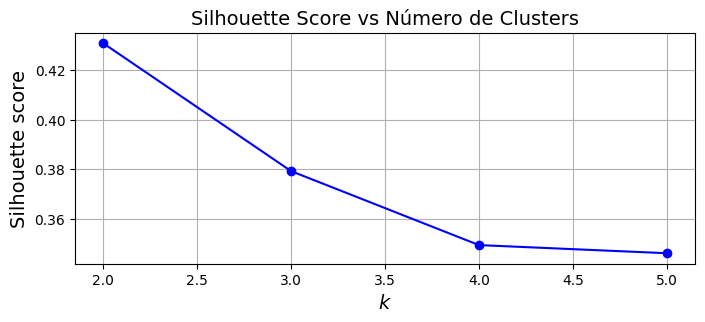

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1, 10)]
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]

max_k = min(20, len(blob_centers))  # no más de los centros generados
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1, max_k + 1)]
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]

# Generar eje x para k de 2 hasta max_k
ks = list(range(2, max_k + 1))

# plt.figure(figsize=(8, 3))
# plt.plot(ks, silhouette_scores, "bo-")
# # plt.plot(range(2, 10), silhouette_scores, "bo-")
# plt.xlabel("$k$", fontsize=14)
# plt.ylabel("Silhouette score", fontsize=14)
# plt.axis([1.8, 8.5, 0.55, 0.7])
# plt.show()

plt.figure(figsize=(8, 3))
plt.plot(ks, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.title("Silhouette Score vs Número de Clusters", fontsize=14)
plt.grid(True)
plt.show()

También es muy útil visualizar los diagramas de silueta, en el que visualizaremos todos los coeficientes de silueta ordenados por grupos y su valor.

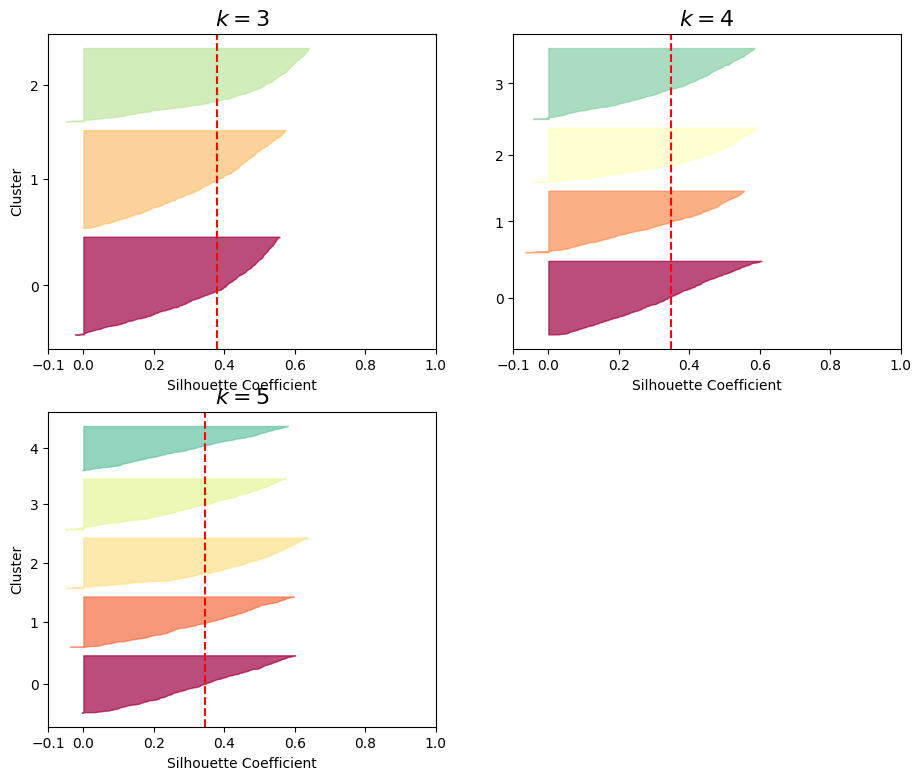

In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

plt.figure(figsize=(11, 9))

# for k in (3, 4, 5, 6):
#     plt.subplot(2, 2, k - 2)

valid_ks = [k for k in (3, 4, 5, 6) if k <= len(kmeans_per_k)]  # Filtrar solo los ks válidos


for plot_idx, k in enumerate(valid_ks):
    plt.subplot(2, 2, plot_idx + 1)  # enumerar para evitar errores


    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (3, 4, 5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

### K-Means para aprendizaje semi-supervisado.

El aprendizaje semi-supervisado (o *Semi-supervised Learning*) comprende el conjunto de técnicas que nos permiten entrenar modelos con datasets parcialmente etiquetados. En esta sección vamos a ver un ejemplo de como podemos aplicar esta técnica con el dataset MNIST y usando *K-Means*. Empezamos descargando el dataset.

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.int64)

X_train, X_test, y_train, y_test = train_test_split(
    mnist["data"], mnist["target"], random_state=42)

Imagina que el dataset no estuviese etiquetado, es decir, que tuviésemos solo los dígitos sin la clase (sólo $X$ y no $y$) y tampoco supiésemos cuantas clases diferentes tenemos. Lo primero que podríamos hacer es entrenar un modelo de *K-Means* con, por ejemplos, 50 grupos. De esta manera encontraremos aquellas imágenes más representativas de cada grupo.

In [ ]:
from sklearn.cluster import KMeans

k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)

In [ ]:
print(X_digits_dist.shape)
print(X_digits_dist)

(52500, 50)
[[1931.22078607 2100.3149128  2000.74724321 ... 1953.39867724
  2127.65265723 2495.81291498]
 [1834.73591016 1390.99355036 1970.85177834 ... 2071.88808281
  1800.7697851  2176.1228895 ]
 [2321.62120749 2687.27840771 2531.62835156 ... 2274.41005748
  2383.4494423  2548.81868214]
 ...
 [2082.51416977 1164.58353907 1885.38888914 ... 1722.16803724
  1984.7435881  2439.35223217]
 [2249.5257633  2749.38376706 2622.32518126 ... 2453.41820643
  2184.87324649 2086.96910164]
 [2280.40981965 2539.23857732 2801.47053964 ... 2708.40963776
  2438.53177798 2545.60435974]]


In [ ]:
idxs = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train.values[idxs]

In [ ]:
print(X_representative_digits.shape)
print(X_representative_digits)

(50, 784)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


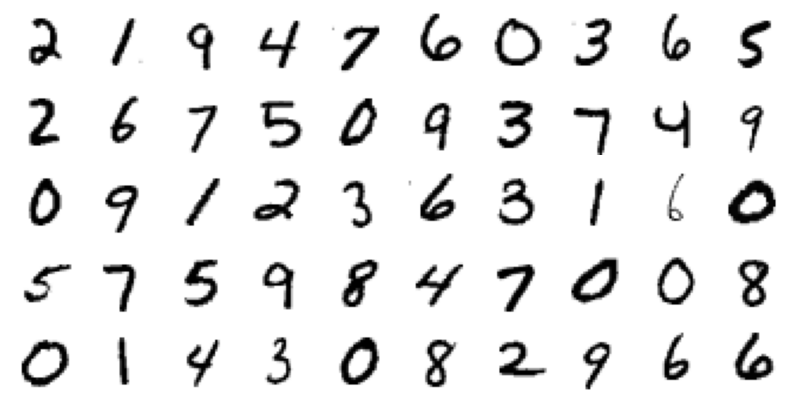

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
for index, X_representative_digit in enumerate(X_representative_digits):
  plt.subplot(5, 10, index+1)
  plt.imshow(X_representative_digit.reshape(28,28), cmap="binary")
  plt.axis('off')
plt.show()

El siguiente paso consiste en anotar manualmente estas etiquetas (aquí haremos trampas ya que disponemos de dichas etiquetas :p).

In [ ]:
y_representative_digits = y_train.values[idxs]

Y entrenaremos un clasificados usando estas imágenes representativas.

In [ ]:
from sklearn.linear_model import LogisticRegression


log_reg2 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg2.fit(X_representative_digits, y_representative_digits)
log_reg2.score(X_test, y_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


CPU times: user 191 ms, sys: 1.07 ms, total: 192 ms
Wall time: 114 ms


0.7690285714285714

Como puedes observar hemos obtenido una precisión de casi el $80%$ habiendo anotado simplemente 50 imágenes, pero aquellas más representativas. Entrenar el mismo modelo con 50 imágenes aleatorias nos daría peores resultados.

In [ ]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg.fit(X_train[:50], y_train[:50])
log_reg.score(X_test, y_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


CPU times: user 295 ms, sys: 305 µs, total: 295 ms
Wall time: 242 ms


0.566

Esto pone de manifiesto que a la hora de entrenar modelos de ML no es tan importante la cantidad de datos, sino la calidad.

Ahora que tenemos un clasificador, podemos usarlo para anotar de manera automática el resto de imágenes. Para ello asignaremos, en cada grupo, la misma etiqueta a todas las muestras que la muestra representativa.

In [ ]:
y_train_propagated = np.empty(len(X_train))
for i in range(k):
  y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [ ]:
log_reg3 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg3.fit(X_train[:1000], y_train_propagated[:1000])
log_reg3.score(X_test, y_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


CPU times: user 6.36 s, sys: 18.6 ms, total: 6.38 s
Wall time: 3.37 s


0.7592

Esto sin embargo empeora nuestro clasificador, incluso usando más muestras de entrenamiento. Esto es debido al ruido que estamos introduciendo, ya que no todas las imágenes estarán bien agrupadas. Para mejorar esto podemos asignar etiquetas a aquellas muestras más cercanas a la imagen más representativa de cada grupo, o aplicar técnicas de aprendizaje activo.

### Aprendizaje Activo

El aprendizaje activo (o *Active Learning*) consiste en entrenar modelos de ML de manera iterativa, incluyendo en cada iteración nuevas muestras al dataset focalizando en ejemplos en loa que el modelo tenga más problemas.

In [ ]:
probas = log_reg3.predict_proba(X_train[:1000])
labels_ixs = np.argmax(probas, axis=1)
labels = np.array([proba[ix] for proba, ix in zip(probas, labels_ixs)])
sorted_ixs = np.argsort(labels)
labels[sorted_ixs[:10]]

array([0.99957165, 0.99968615, 0.99971378, 0.99972573, 0.99975835,
       0.9997591 , 0.99976207, 0.99976918, 0.99977587, 0.99978163])

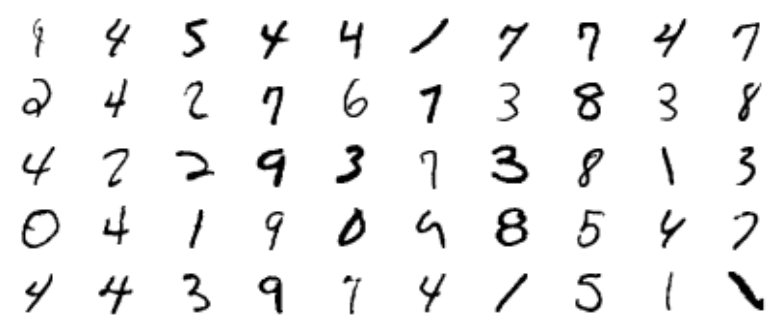

In [ ]:
X_lowest = X_train.values[:1000][sorted_ixs[:k]]
plt.figure(figsize=(10, 4))
for index, img in enumerate(X_lowest):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(img.reshape(28, 28), cmap="binary", interpolation="bilinear")
    plt.axis('off')
plt.show()

In [ ]:
y_lowest = y_train.values[:1000][sorted_ixs[:k]]
y_lowest

array([4, 4, 5, 4, 4, 1, 7, 7, 4, 7, 2, 4, 2, 7, 6, 7, 3, 8, 3, 8, 4, 2,
       2, 9, 3, 7, 3, 8, 1, 3, 0, 4, 1, 9, 0, 9, 8, 5, 4, 7, 4, 4, 3, 9,
       7, 4, 1, 3, 1, 1])

In [ ]:
y_train2 = y_train_propagated[:1000].copy()
y_train2[sorted_ixs[:k]] = y_lowest

In [ ]:
log_reg5 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg5.fit(X_train[:1000], y_train2)
log_reg5.score(X_test, y_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


CPU times: user 5.76 s, sys: 4.74 ms, total: 5.77 s
Wall time: 2.99 s


0.7663428571428571

Podemos repetir el proceso tantas veces como haga falta hasta llegar a las prestaciones requeridas.

## Otras técnicas de aprendizaje no supervisado

Otras técnicas muy usadas de aprendizaje no supervisado son

### DBSCAN

Este algoritmo define *clusters* como regiones continuas de alta densidad, agrupando progresivamente muestras cercanas entre ellas.

In [ ]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [ ]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6])

In [ ]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)
np.unique(dbscan2.labels_)

array([0, 1])

In [ ]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

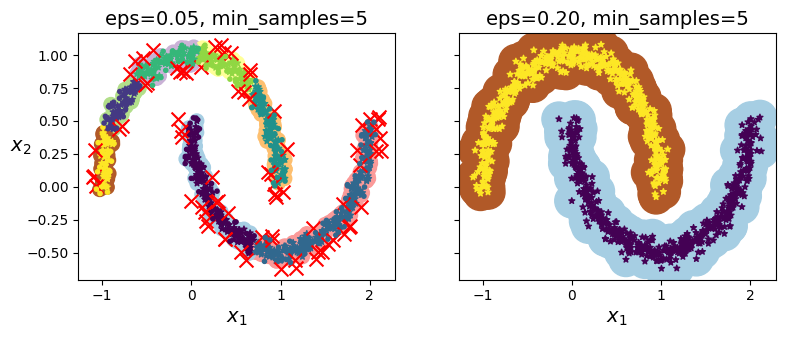

In [ ]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()

Podemos considerar las muestras fuera de los grupos como anomalías, o bien usar un clasificador de vecinos cercanos para clasificar nuevas muestras.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan2.components_, dbscan2.labels_[dbscan2.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [ ]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0])

In [ ]:
knn.predict_proba(X_new)

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

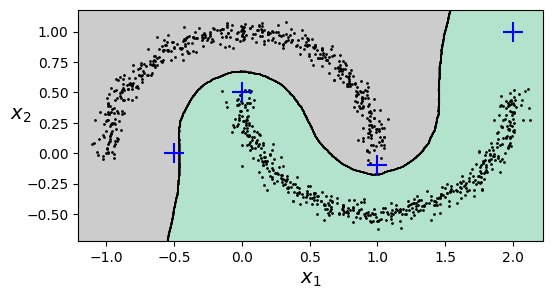

In [ ]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
plt.show()

### Gaussian Mixtures

Los modelos de *Gaussian Mixtures* son modelos probabilísticos que asumen que las muestras del conjunto de datos provienen de la mezcla de distribuciones Gaussianas cuyos parámetros son desconocidos.

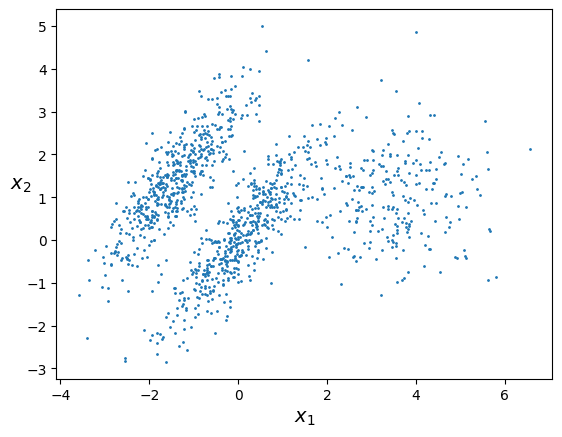

In [ ]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]
plot_clusters(X)

In [ ]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

In [ ]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')

    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

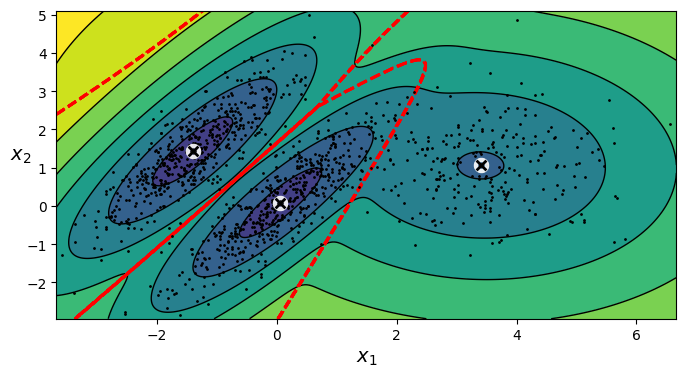

In [ ]:
plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm, X)
plt.show()

In [ ]:
gm.weights_

array([0.40005972, 0.20961444, 0.39032584])

In [ ]:
gm.means_

array([[-1.40764129,  1.42712848],
       [ 3.39947665,  1.05931088],
       [ 0.05145113,  0.07534576]])

In [ ]:
gm.covariances_

array([[[ 0.63478217,  0.72970097],
        [ 0.72970097,  1.16094925]],

       [[ 1.14740131, -0.03271106],
        [-0.03271106,  0.95498333]],

       [[ 0.68825143,  0.79617956],
        [ 0.79617956,  1.21242183]]])

In [ ]:
gm.predict(X)

array([2, 2, 0, ..., 1, 1, 1])

In [ ]:
gm.predict_proba(X)

array([[6.76282339e-07, 2.31833274e-02, 9.76815996e-01],
       [6.74575575e-04, 1.64110061e-02, 9.82914418e-01],
       [9.99922764e-01, 1.99781831e-06, 7.52377580e-05],
       ...,
       [2.12540639e-26, 9.99999568e-01, 4.31902443e-07],
       [1.45002917e-41, 1.00000000e+00, 5.20915318e-16],
       [7.93266114e-41, 1.00000000e+00, 2.30971331e-15]])

Estos modelos son generativos, por lo que permiten crear nuevas muestras.

In [ ]:
X_new, y_new = gm.sample(6)
X_new

array([[-2.32491052,  1.04752548],
       [-1.16654983,  1.62795173],
       [ 1.84860618,  2.07374016],
       [ 3.98304484,  1.49869936],
       [ 3.8163406 ,  0.53038367],
       [ 0.38079484, -0.56239369]])

In [ ]:
y_new

array([0, 0, 1, 1, 1, 2])

Definiendo un valor límite podemos detectar anomalías en los datos.

In [ ]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

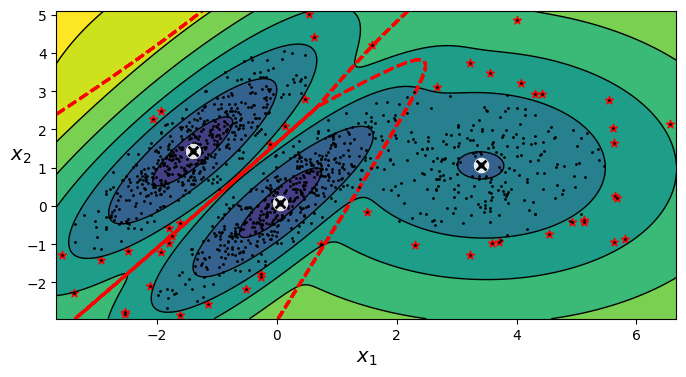

In [ ]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)

plt.show()

Una alternativa muy usada para seleccionar el número de grupos óptimos es el uso de *Bayesian Gaussian Mixtures*, ya que pueden asignar pesos cercanos a 0 a grupos innecesarios.

In [ ]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)

/usr/local/lib/python3.12/dist-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

In [ ]:
np.round(bgm.weights_, 2)

array([0.4 , 0.21, 0.  , 0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

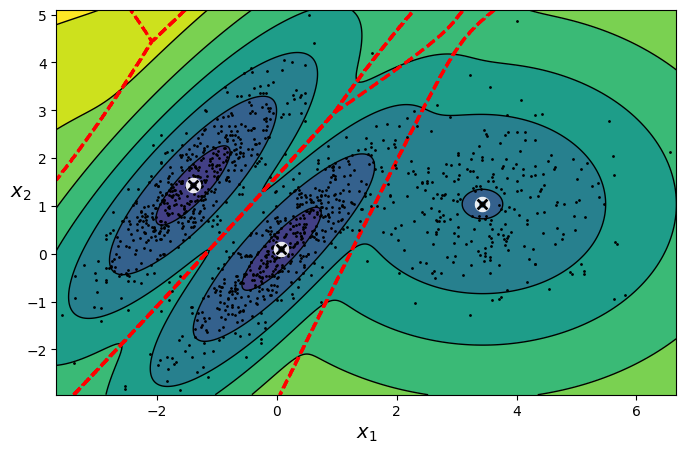

In [ ]:
plt.figure(figsize=(8, 5))
plot_gaussian_mixture(bgm, X)
plt.show()

## Resumen

En este post hemos introducido el concepto del aprendizaje no supervisado, modelos de *Machine Learning* que podemos usar cuando nuestros datos no están etiquetados. Hemos visto el algoritmo de *K-Means* y aplicado su uso en aprendizaje semi-supervisado y *active learning*. Por último, hemos introducido otros métodos útiles para detección de anomalías como *DBSCAN* o *Gaussian Mixtures*.


# Punto 1

- Modificar el generador de dataset aleatorio, para que este pueda generar centroides en cantidades entre 1 y 20, y considerando una importante distancia entre ellos con la finalidad de permitir la verificación visual una vez se realice el entrenamiento del modelo.

- Modificar y adecuar todos los códigos para su respectivo aplicación y demostración de la efectividad del modelo KMeans, metodo del codo y silhouette score.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

def _rng(random_state):
    return np.random.RandomState(random_state) if not isinstance(random_state, np.random.RandomState) else random_state


## Generador de centros bien separados


In [ ]:

def generate_separated_centers(n_centers, n_features=2, center_box=(-50, 50), min_sep=10.0,
                               max_tries=10000, random_state=42):
    rng = _rng(random_state)
    low, high = center_box
    centers = []
    tries = 0

    while len(centers) < n_centers and tries < max_tries:
        c = rng.uniform(low, high, size=n_features)
        if not centers:
            centers.append(c)
        else:
            dists = np.linalg.norm(c - np.array(centers), axis=1)
            if np.all(dists >= min_sep):
                centers.append(c)
        tries += 1

    if len(centers) < n_centers:
        raise ValueError("No se pudo ubicar todos los centros con la separación solicitada. "
                         "Prueba con un min_sep menor o una caja (center_box) más amplia.")
    return np.array(centers)



## Generador de blobs con separación controlada

In [ ]:

def make_separated_blobs(n_samples=3000, n_features=2, n_centers=None, cluster_std=0.8,
                         center_box=(-60, 60), min_sep=None, random_state=42):
    rng = _rng(random_state)
    if n_centers is None:
        n_centers = rng.randint(1, 21)
    if min_sep is None:
        min_sep = 8.0 * cluster_std

    centers = generate_separated_centers(n_centers=n_centers, n_features=n_features,
                                         center_box=center_box, min_sep=min_sep,
                                         random_state=rng)

    X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=centers,
                      cluster_std=cluster_std, shuffle=True, random_state=rng)
    return X, y, centers



## Evaluación con KMeans, Codo e Índice de Silhouette



In [ ]:

def kmeans_evaluate(X, k_min=1, k_max=20, random_state=42):
    ks = list(range(k_min, k_max + 1))
    inertias = []
    silhouettes = []
    fitted = {}

    for k in ks:
        km = KMeans(n_clusters=k, n_init=10, random_state=random_state)
        labels = km.fit_predict(X)
        inertias.append(km.inertia_)
        silhouettes.append(silhouette_score(X, labels) if k > 1 else np.nan)
        fitted[k] = (km, labels)

    silhouettes_arr = np.array(silhouettes, dtype=float)
    if np.all(np.isnan(silhouettes_arr)):
        best_k = 1
    else:

        offset = 1
        best_k = ks[offset + np.nanargmax(silhouettes_arr[offset:])]
    return ks, inertias, silhouettes, fitted, best_k



## Visualizaciones (2D por PCA si es necesario)



In [ ]:

def _to_2d(X):
    if X.shape[1] == 2:
        return X, None
    pca = PCA(n_components=2, random_state=42)
    return pca.fit_transform(X), pca

def plot_elbow(ks, inertias):
    plt.figure()
    plt.plot(ks, inertias, marker="o")
    plt.title("Método del Codo (Inercia vs k)")
    plt.xlabel("k")
    plt.ylabel("Inercia")
    plt.grid(True)
    plt.show()

def plot_silhouette(ks, silhouettes):
    plt.figure()
    plt.plot(ks, silhouettes, marker="o")
    plt.title("Índice de Silhouette vs k")
    plt.xlabel("k")
    plt.ylabel("Silhouette")
    plt.grid(True)
    plt.show()

def plot_scatter(X2d, labels=None, centers2d=None, title="Dispersión"):
    plt.figure()
    if labels is None:
        plt.scatter(X2d[:, 0], X2d[:, 1], s=12)
    else:
        plt.scatter(X2d[:, 0], X2d[:, 1], s=12, c=labels)
    if centers2d is not None:
        plt.scatter(centers2d[:, 0], centers2d[:, 1], marker="x", s=100)
    plt.title(title)
    plt.xlabel("Comp. 1")
    plt.ylabel("Comp. 2")
    plt.grid(True)
    plt.show()


Forma de X: (3000, 2)
Número real de centros: 7
Mejor k por Silhouette: 7 | Silhouette=0.9368


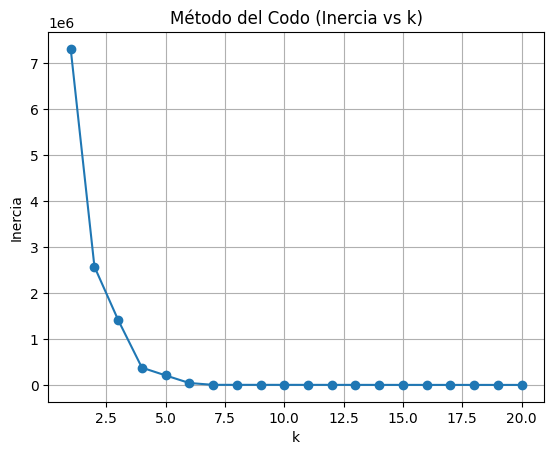

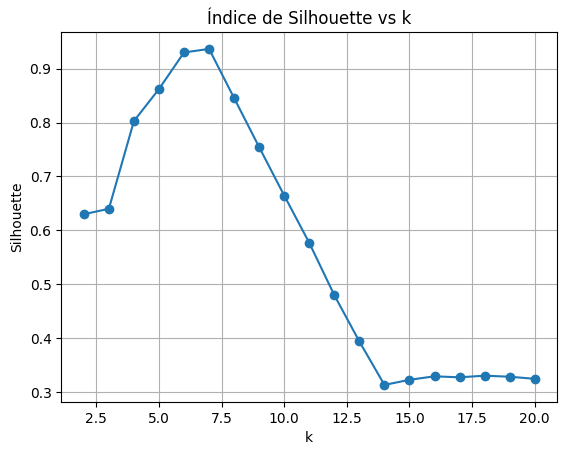

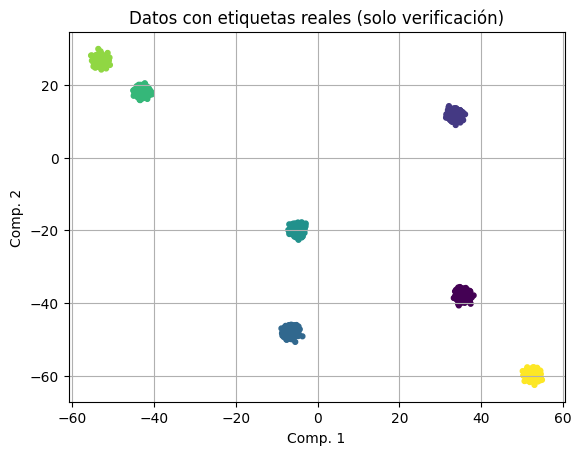

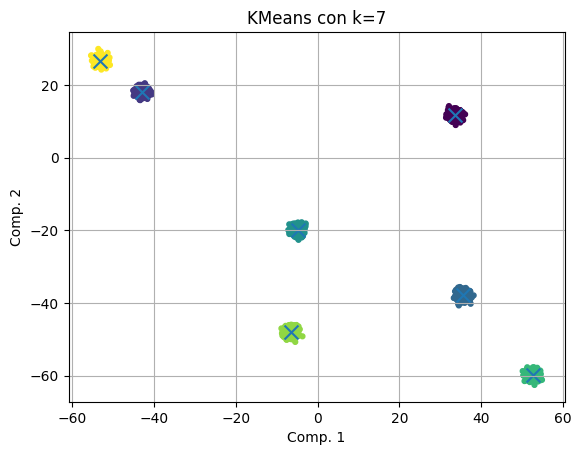

In [ ]:

N_SAMPLES = 3000
N_FEATURES = 2
N_CENTERS = None
CLUSTER_STD = 0.8
CENTER_BOX = (-60, 60)
MIN_SEP = None
RANDOM_STATE = 42

X, y_true, centers = make_separated_blobs(n_samples=N_SAMPLES, n_features=N_FEATURES,
                                          n_centers=N_CENTERS, cluster_std=CLUSTER_STD,
                                          center_box=CENTER_BOX, min_sep=MIN_SEP,
                                          random_state=RANDOM_STATE)

print(f"Forma de X: {X.shape}")
print(f"Número real de centros: {centers.shape[0]}")

ks, inertias, silhouettes, fitted, best_k = kmeans_evaluate(X, k_min=1, k_max=20, random_state=RANDOM_STATE)
print(f"Mejor k por Silhouette: {best_k} | Silhouette={np.nanmax(silhouettes):.4f}")

plot_elbow(ks, inertias)
plot_silhouette(ks, silhouettes)

X2d, pca = _to_2d(X)

plot_scatter(X2d, labels=y_true, title="Datos con etiquetas reales (solo verificación)")

km, y_pred = fitted[best_k]
if pca is not None:
    centers2d = pca.transform(km.cluster_centers_)
else:
    centers2d = km.cluster_centers_
plot_scatter(X2d, labels=y_pred, centers2d=centers2d, title=f"KMeans con k={best_k}")



# Punto 2

- Buscar un dataset que no tenga etiquetas, que tenga un n mayor a 10 y un m mayor a 10.000 ejemplos, tendrá mayores puntajes, datasets que tengan contenido gráfico, audio, textos o datos que muestre efectos reales en cualquier ámbito.

- Los datasets no deben ser similares para ello deben coordinar esto con el universitario Romero Morales Jhojan Erick.

- Aplicar aprendizaje semisupervisado

- Aplicar aprendizaje activo



In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.semi_supervised import LabelPropagation
import numpy as np

file_clean = "/content/healthcare_dataset_1.xlsx"
df_real = pd.read_excel(file_clean)

print("Shape:", df_real.shape)
df_real.head()


Shape: (55500, 11)


,Age,Gender,Blood Type,Date of Admission,Doctor,Hospital,Insurance Provider,Room Number,Admission Type,Discharge Date,Medication
0,30,Male,B-,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,328,Urgent,2024-02-02,Paracetamol
1,62,Male,A+,2019-08-20,Samantha Davies,Kim Inc,Medicare,265,Emergency,2019-08-26,Ibuprofen
2,76,Female,A-,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,205,Emergency,2022-10-07,Aspirin
3,28,Female,O+,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,450,Elective,2020-12-18,Ibuprofen
4,43,Female,AB+,2022-09-19,Kathleen Hanna,White-White,Aetna,458,Urgent,2022-10-09,Penicillin



## Preprocesamiento



In [2]:
df_proc = df_real.copy()

le_dict = {}
for col in df_proc.select_dtypes(include="object").columns:
    le = LabelEncoder()
    df_proc[col] = le.fit_transform(df_proc[col].astype(str))
    le_dict[col] = le

scaler = StandardScaler()
X = scaler.fit_transform(df_proc.values)

print("Matriz final de features:", X.shape)


Matriz final de features: (55500, 11)



## Aprendizaje semisupervisado (Label Propagation)



In [8]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.semi_supervised import LabelSpreading

df_sample = df_real.sample(n=5000, random_state=42).copy()

le_dict = {}
for col in df_sample.select_dtypes(include="object").columns:
    le = LabelEncoder()
    df_sample[col] = le.fit_transform(df_sample[col].astype(str))
    le_dict[col] = le

scaler = StandardScaler()
X_small = scaler.fit_transform(df_sample.values)

y_full = (df_sample["Age"] >= 50).astype(int).values

rng = np.random.RandomState(42)
mask = rng.rand(len(y_full)) < 0.05
y_semi = np.copy(y_full)
y_semi[~mask] = -1

print("Ejemplos etiquetados:", np.sum(mask), "de", len(y_full))

lp = LabelSpreading(kernel="knn", n_neighbors=10)
lp.fit(X_small, y_semi)

acc = np.mean(lp.transduction_ == y_full)
print("Exactitud semisupervisado:", acc)



Ejemplos etiquetados: 249 de 5000
Exactitud semisupervisado: 0.829



## Aprendizaje Activo (simulación)



In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_full, y_test = train_test_split(X_small, y_full, test_size=0.8, random_state=42)

known_idx = rng.choice(len(X_train), size=50, replace=False)
y_train_partial = np.full_like(y_train_full, fill_value=-1)
y_train_partial[known_idx] = y_train_full[known_idx]

mask_known = y_train_partial != -1
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train[mask_known], y_train_partial[mask_known])

probas = clf.predict_proba(X_train[~mask_known])
uncertainty = 1 - np.max(probas, axis=1)

query_idx = np.argsort(-uncertainty)[:100]
selected_samples = np.where(~mask_known)[0][query_idx]

y_train_partial[selected_samples] = y_train_full[selected_samples]

mask_known2 = y_train_partial != -1
clf.fit(X_train[mask_known2], y_train_partial[mask_known2])

acc_active = clf.score(X_test, y_test)
print("Exactitud tras aprendizaje activo:", acc_active)



Exactitud tras aprendizaje activo: 0.95425



# Punto 3

- Buscar un dataset para otras técnicas de aprendizaje no supervisado

- Aplicar dbscan, gaussian mixtures.


In [10]:

from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

print("Matriz de features disponible:", X.shape)


Matriz de features disponible: (55500, 11)



## DBSCAN


In [11]:

dbscan = DBSCAN(eps=2.0, min_samples=10)
labels_db = dbscan.fit_predict(X)

n_clusters_db = len(set(labels_db)) - (1 if -1 in labels_db else 0)
print("Clusters detectados por DBSCAN:", n_clusters_db)
print("Ejemplos de etiquetas DBSCAN:", np.unique(labels_db)[:10])


Clusters detectados por DBSCAN: 2
Ejemplos de etiquetas DBSCAN: [0 1]



## Gaussian Mixture Models (GMM)



In [12]:

bic_scores = []
aic_scores = []
components_range = range(2, 11)

for k in components_range:
    gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=42)
    gmm.fit(X)
    bic_scores.append(gmm.bic(X))
    aic_scores.append(gmm.aic(X))

best_k_bic = components_range[np.argmin(bic_scores)]
best_k_aic = components_range[np.argmin(aic_scores)]

print("Mejor k por BIC:", best_k_bic)
print("Mejor k por AIC:", best_k_aic)


Mejor k por BIC: 6
Mejor k por AIC: 6


In [13]:

gmm_best = GaussianMixture(n_components=best_k_bic, covariance_type='full', random_state=42)
labels_gmm = gmm_best.fit_predict(X)

print("Clusters GMM (BIC):", np.unique(labels_gmm)[:10])


Clusters GMM (BIC): [0 1 2 3 4 5]
